In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import yfinance as yf
import datetime as dt

In [76]:
import sklearn
import matplotlib
import flask

print("numpy = ", np.__version__)
print("pandas =", pd.__version__)
print("matplotlib =", matplotlib.__version__)
print("scikit-learn =", sklearn.__version__)
print("keras = ", keras.__version__)
print("yfinance = ", yf.__version__)
print("joblib = ", joblib.__version__)
print("Flask = ", flask.__version__)

numpy =  2.0.2
pandas = 2.2.3
matplotlib = 3.10.0
scikit-learn = 1.6.1
keras =  3.8.0
yfinance =  0.2.51
joblib =  1.4.2
Flask =  3.1.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6924\3945621075.py:12: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask = ", flask.__version__)


In [88]:
stock = "AAPL"
start_data = dt.datetime(2000, 1, 1)
end_data = dt.datetime(2024, 12, 31)
df = yf.download(stock, start_data, end_data)

[*********************100%***********************]  1 of 1 completed


In [67]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [68]:
df.columns = ["Close", "High", "Low", "Open", "Volume"]

In [5]:
df = df.reset_index()

In [6]:
data = df.Close

In [7]:
data.shape

(6288,)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

In [9]:
scaled_data.shape

(6288, 1)

In [10]:
sequence_length = 200
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
  X.append(scaled_data[i-sequence_length:i, 0])
  y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
X.shape

(6088, 200, 1)

In [12]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

## Using tf

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 150, return_sequences = True, input_shape = (X.shape[1], 1)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 60, return_sequences = False),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

E:\hands_on_ml\projects\stock-price-prediction-python\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 45s 325ms/step - loss: 1.6388e-04 - val_loss: 3.9813e-05
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 37s 301ms/step - loss: 4.4449e-06 - val_loss: 7.7280e-05
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 36s 295ms/step - loss: 4.0031e-06 - val_loss: 3.4213e-05
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 37s 301ms/step - loss: 3.7137e-06 - val_loss: 5.6794e-05
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 37s 302ms/step - loss: 3.8315e-06 - val_loss: 3.1674e-05
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 34s 276ms/step - loss: 3.2233e-06 - val_loss: 4.1175e-05
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 33s 271ms/step - loss: 3.5996e-06 - val_loss: 4.3396e-05
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 32s 260ms/step - loss: 3.1796e-06 - val_loss: 2.6906e-05
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - loss: 3.0824e-06 - val_loss: 2.4123e-05
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - loss: 2.5963e-06 - val_loss: 2.4071e-05
Epoch 11/100
122/12

In [16]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step  


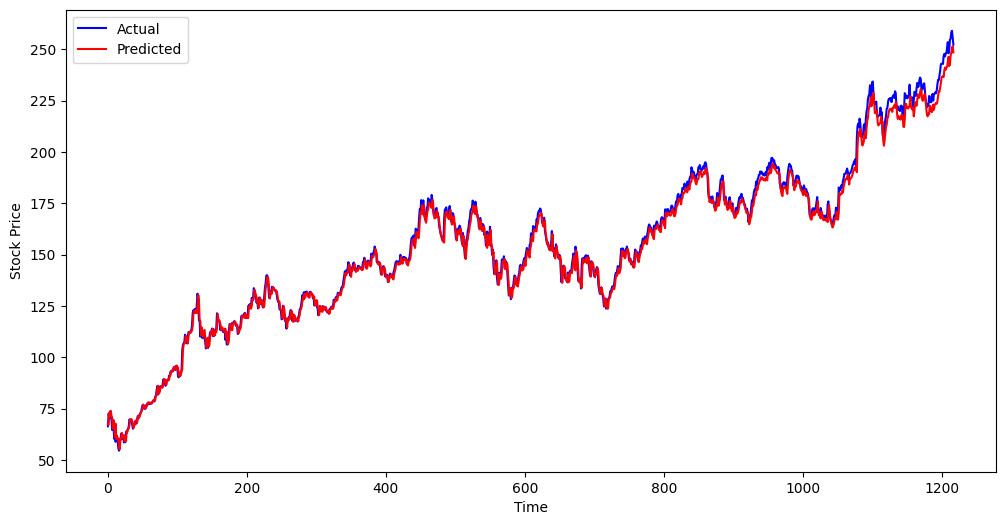

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
model.save("stock-price-prediction-model.keras")

In [36]:
model.save("stock-price-prediction-model.h5")

In [21]:
import joblib

joblib.dump(model, 'stock-price-prediction-model.pkl')
joblib.dump(scaler, 'stock-price-prediction-scaler.pkl')

['stock-price-prediction-scaler.pkl']

## Using Keras

In [22]:
from keras.layers import LSTM, Dense
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
from keras.models import Sequential

In [24]:
keras_model = Sequential()

keras_model.add(LSTM(units = 150, return_sequences = True, input_shape = (X.shape[1], 1)))
keras_model.add(LSTM(units = 60))
keras_model.add(Dense(25))
keras_model.add(Dense(1))

E:\hands_on_ml\projects\stock-price-prediction-python\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
keras_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

In [26]:
history = keras_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - loss: 1.5901e-04 - val_loss: 3.5382e-05
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - loss: 4.2481e-06 - val_loss: 3.3317e-05
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - loss: 2.6569e-06 - val_loss: 3.0600e-05
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - loss: 4.0703e-06 - val_loss: 2.8792e-05
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - loss: 3.0886e-06 - val_loss: 2.7036e-05
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - loss: 2.7783e-06 - val_loss: 2.6796e-05
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - loss: 3.5687e-06 - val_loss: 2.4975e-05
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - loss: 2.7620e-06 - val_loss: 6.6310e-05
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 3.7794e-06 - val_loss: 2.5301e-05
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - loss: 2.7296e-06 - val_loss: 2.3690e-05
Epoch 11/100
122/12

In [32]:
keras_predictions = keras_model.predict(X_test)
keras_predictions = scaler.inverse_transform(keras_predictions.reshape(-1, 1))

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step 


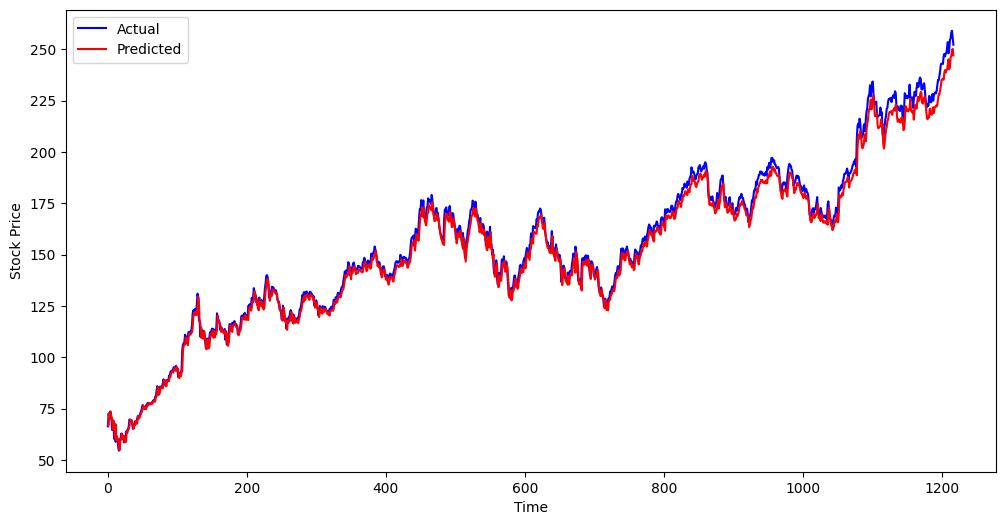

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(keras_predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
keras_model.save('stock-price-prediction-keras-model.keras')

In [30]:
keras_model.save('stock-price-prediction-keras-model.h5')

In [31]:
joblib.dump(model, 'stock-price-prediction-keras-model.pkl')

['stock-price-prediction-keras-model.pkl']

## ----

## Real data prediction

In [52]:
!pip install certifi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

In [57]:
!pip install yahooquery

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----------- ---------------------------- 1.0/3.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 17.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0


  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import certifi
import ssl
ssl_context = ssl.create_default_context(cafile=certifi.where())

In [54]:
import yfinance as yf
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.poolmanager import PoolManager
import ssl

class SSLAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        context = ssl.create_default_context()
        context.check_hostname = False
        context.verify_mode = ssl.CERT_NONE
        kwargs['ssl_context'] = context
        return super(SSLAdapter, self).init_poolmanager(*args, **kwargs)

session = requests.Session()
session.mount('https://', SSLAdapter())

In [1]:
import datetime as dt
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
# import requests

# stock_id = "AAPL"
# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_id}&outputsize=full&apikey=YG8JN0I1UN1ARP9T'
# r = requests.get(url, verify=False)
# data = r.json()

# data

In [3]:
# from yahooquery import Ticker

# ticker = Ticker('^NSEI')
# data = ticker.history(period='3y')
# print(data)

In [84]:
!echo %VIRTUAL_ENV%

E:\hands_on_ml\projects\stock-price-prediction-python\.env


In [13]:
ticker = 'AAPL'

# Get the ticker object
stock = yf.Ticker(ticker)

# Get real-time price data
price = stock.history(period="2y")['Close']
df = pd.DataFrame(price)

In [14]:
df

,Close
Date,
2023-01-17 00:00:00-05:00,134.525330
2023-01-18 00:00:00-05:00,133.802948
2023-01-19 00:00:00-05:00,133.862320
2023-01-20 00:00:00-05:00,136.435257
2023-01-23 00:00:00-05:00,139.641525
...,...
2025-01-10 00:00:00-05:00,236.850006
2025-01-13 00:00:00-05:00,234.399994
2025-01-14 00:00:00-05:00,233.279999


In [81]:
stock = "AAPL"
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime.now().date()
# end_date = dt.datetime(2025, 1, 1)
df = yf.download(stock, '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [82]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300
2025-01-15,237.869995,238.960007,234.429993,234.639999,39832000
2025-01-16,228.259995,238.009995,228.029999,237.350006,71604800


In [27]:
df = df.reset_index()

In [10]:
X_data = df.Close

In [29]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.40)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.40): int(len(df))])

In [30]:
data_testing.shape

(451, 1)

In [31]:
sequence_length = 200

In [32]:
scaler = joblib.load('stock-price-prediction-scaler.pkl')

In [33]:
past_200_days = data_training.tail(sequence_length+1)
final_df = pd.concat([past_200_days,data_testing], ignore_index=True)
input_data = scaler.fit_transform(final_df)

In [34]:
final_df.shape

(652, 1)

In [35]:
input_data.shape

(652, 1)

In [36]:
x_test, y_test = [], []
for i in range(sequence_length+1, input_data.shape[0]):
  x_test.append(input_data[i - sequence_length:i])
  y_test.append(input_data[i, 0])
X_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
X_test.shape

(451, 200, 1)

In [38]:
y_test.shape

(451,)

In [39]:
X_test[0][0][0]

np.float64(0.11820048330342936)

In [40]:
y_test[0]

np.float64(0.16539641860500054)

In [58]:
pkl_model = joblib.load("stock-price-prediction-model.pkl")

E:\hands_on_ml\projects\stock-price-prediction-python\.env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [59]:
pkl_prediction = pkl_model.predict(X_test)
# predictions_new = scaler.inverse_transform(predictions_new.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


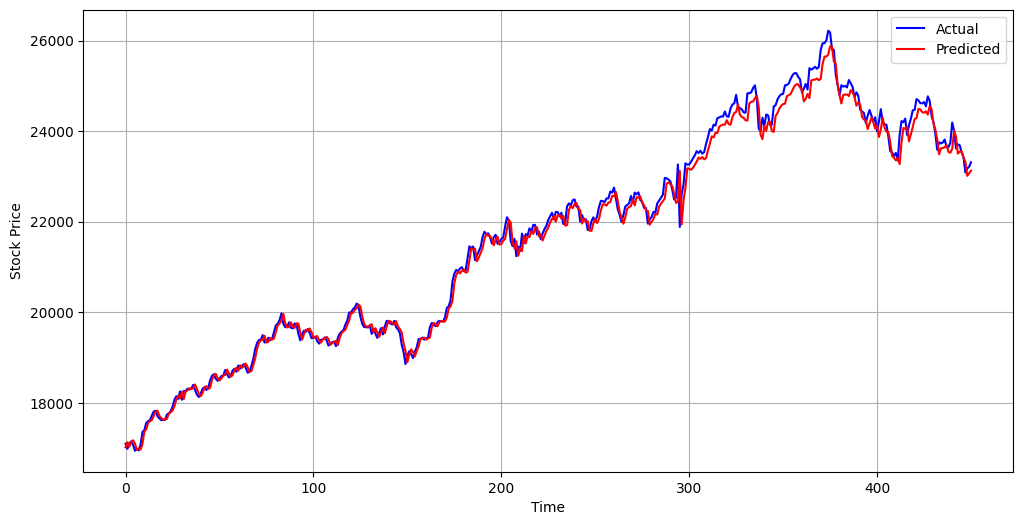

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(pkl_prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

E:\hands_on_ml\projects\stock-price-prediction-python\.env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


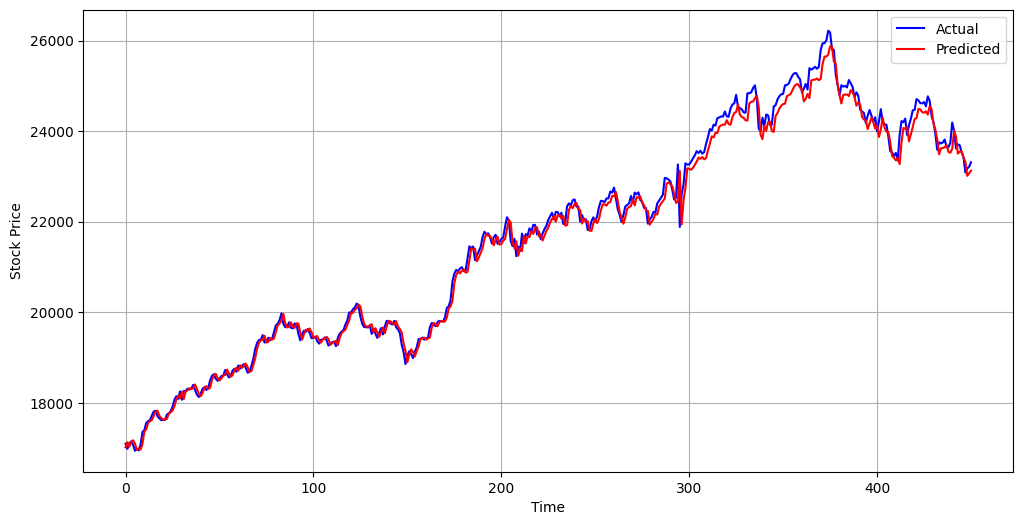

In [61]:
from keras.models import load_model
model = load_model("stock-price-prediction-model.keras")

prediction = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


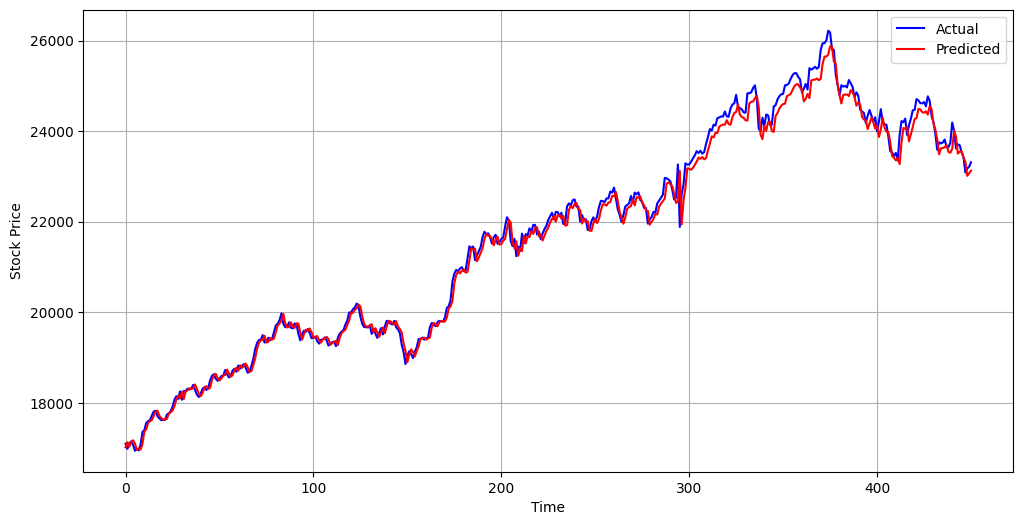

In [62]:
from keras.models import load_model
h5_model = load_model("stock-price-prediction-model.h5")

h5_prediction = h5_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(h5_prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


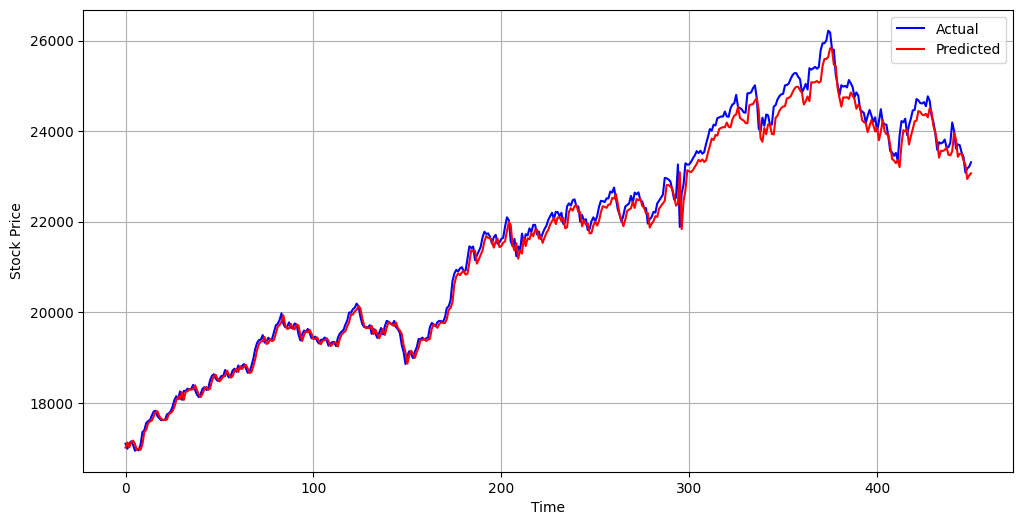

In [63]:
from keras.models import load_model
keras_h5_model = load_model("stock-price-prediction-keras-model.h5")

keras_h5_prediction = keras_h5_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(keras_h5_prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step 


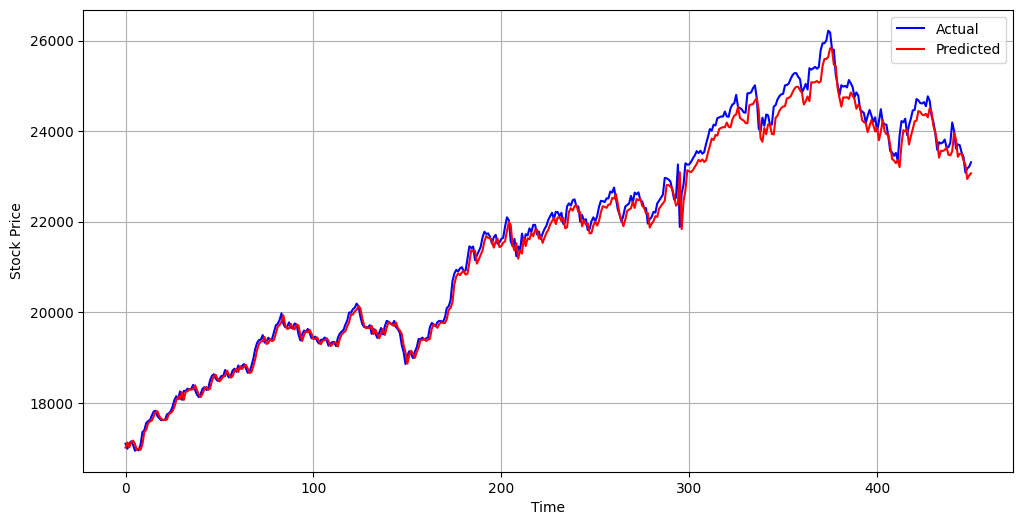

In [64]:
from keras.models import load_model
keras_model = load_model("stock-price-prediction-keras-model.keras")

keras_prediction = keras_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(keras_prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

E:\hands_on_ml\projects\stock-price-prediction-python\.env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


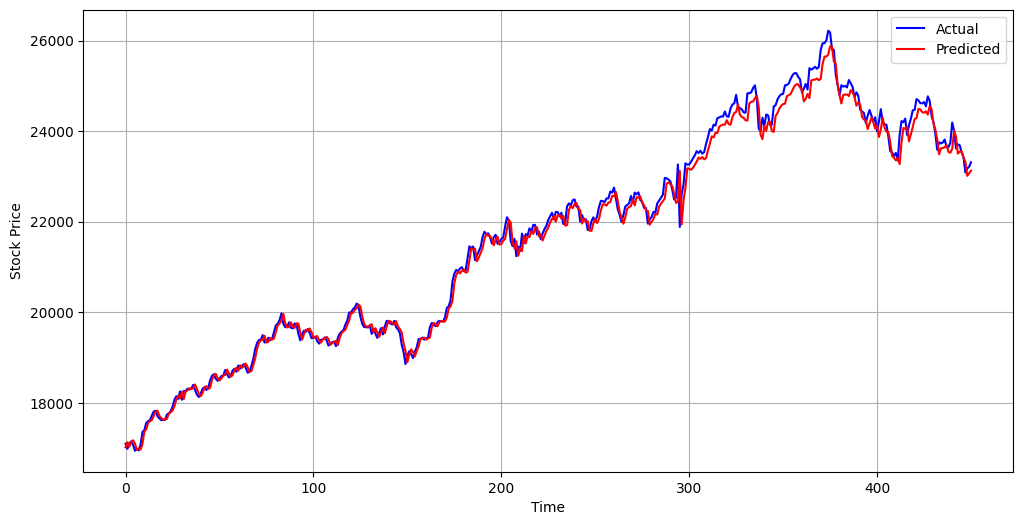

In [65]:
import joblib
keras_pkl_model = joblib.load("stock-price-prediction-keras-model.pkl")

keras_h5_prediction = keras_pkl_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual')
plt.plot(scaler.inverse_transform(keras_h5_prediction.reshape(-1, 1)), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

In [22]:
predictions_new.shape

(449, 1)

In [23]:
y_test.shape

(449,)

In [24]:
print(scaler.inverse_transform(predictions_new.reshape(-1, 1))[-1],  scaler.inverse_transform(y_test.reshape(-1, 1))[-1])

[23381.031] [23431.5]


In [48]:
str(scaler.inverse_transform(predictions_new.reshape(-1, 1))[-1])

'[23381.031]'

In [26]:
scaler.inverse_transform(y_test.reshape(-1, 1)).shape

(449, 1)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(predictions_new.reshape(-1, 1)))

In [28]:
r2

0.9920828719516075

In [29]:
diff = scaler.inverse_transform(y_test.reshape(-1, 1)) - scaler.inverse_transform(predictions_new.reshape(-1, 1))

In [37]:
avg_diff = np.mean(diff)

In [38]:
avg_diff

np.float64(115.0756585815702)

In [42]:
p_df = pd.DataFrame(scaler.inverse_transform(predictions_new.reshape(-1, 1)), columns=["Predicted"])

In [43]:
p_df['Actual'] = scaler.inverse_transform(y_test.reshape(-1, 1))

In [44]:
p_df

,Predicted,Actual
0,17047.908203,16972.150391
1,16985.730469,16985.599609
2,17002.564453,17100.050781
3,17115.292969,16988.400391
4,17011.875000,17107.500000
...,...,...
444,23843.195312,23616.050781
445,23466.552734,23707.900391
446,23525.701172,23688.949219
447,23524.101562,23526.500000


In [1]:
import pickle
import numpy as np
import pandas as pd
# from data_preparation import preparing_data
import yfinance as yf
import matplotlib.pyplot as plt
import os

In [3]:
stock_prediction_model = pickle.load(open('stock_price_prediction_model.pkl', "rb"))
stock_prediction_scaler = pickle.load(open('stock_price_prediction_scaler.pkl', "rb"))

In [4]:
def preparing_data(stock_id, start_data="2022-01-01", chart=False):
    """
    Prepares data for stock prediction and optionally generates a chart of the stock's closing price with EMA indicators.
    Parameters:
    stock_id (str): The stock identifier (ticker symbol) to download data for.
    start_data (str): The start date for downloading stock data in the format 'YYYY-MM-DD'. Default is "2022-01-01".
    chart (bool): If True, generates a chart of the stock's closing price with 100 and 200 days EMA. Default is False.
    Returns:
    tuple: A tuple containing:
        - X_test (numpy.ndarray): The input data for testing the model.
        - y_test (numpy.ndarray): The actual closing prices for testing the model.
        - ema_chart_path_100_200 (str or None): The file path to the generated EMA chart if `chart` is True, otherwise None.
        - date (pandas.Index): The dates corresponding to the last 10 entries in the downloaded stock data.
    Raises:
    ValueError: If the scaler is not loaded.
    """
    
    if stock_prediction_scaler is None:
        raise ValueError("Scaler is not loaded. Cannot proceed with data preparation.")
        
    
    # url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_id}&apikey=YG8JN0I1UN1ARP9T'
    # r = requests.get(url)
    # data = r.json()

    # df = pd.DataFrame(data['Time Series (Daily)']).T
    # df.columns = ['Open', 'High', 'Low', 'Close', 'Volumn']
    # print(df)
    df = yf.download(stock_id, start_data)
    
    date = df.tail(1).index


    ## EMA Chart of 100 & 200
    if chart :

        ema100 = df.Close.ewm(span=100, adjust=False).mean()
        ema200 = df.Close.ewm(span=200, adjust=False).mean()

        fig2, ax2 = plt.subplots(figsize=(12, 6))
        ax2.plot(df.Close, 'y', label='Closing Price')
        ax2.plot(ema100, 'g', label='EMA 100')
        ax2.plot(ema200, 'r', label='EMA 200')
        ax2.set_title("Closing Price vs Time (100 & 200 Days EMA)")
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Price")
        ax2.legend()
        ema_chart_path_100_200 = "static/ema_100_200.png"

        if os.path.exists(ema_chart_path_100_200):
            os.remove(ema_chart_path_100_200)
            print(f"{ema_chart_path_100_200} has been deleted")
        else:
            print(f"{ema_chart_path_100_200} does not exist")

        fig2.savefig(ema_chart_path_100_200)
        plt.close(fig2)
    else :
        ema_chart_path_100_200 = None

    sequence_length = 200

    data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.40)])
    data_testing = pd.DataFrame(df['Close'][int(len(df)*0.40): int(len(df))])

    past_200_days = data_training.tail(sequence_length)
    final_df = pd.concat([past_200_days,data_testing], ignore_index=True)
    input_data = stock_prediction_scaler.fit_transform(final_df)


    x_test, y_test = [], []
    for i in range(sequence_length, input_data.shape[0]):
        x_test.append(input_data[i - sequence_length:i])
        y_test.append(input_data[i, 0])
    X_test, y_test = np.array(x_test), np.array(y_test)
    

    # print(stock_prediction_scaler.inverse_transform(y_test.reshape(-1, 1))[-1])
    return X_test, y_test, ema_chart_path_100_200, date

In [6]:
stock_id = 'AAPL'

X, y, ema_chart_path_100_200, date = preparing_data(stock_id)
    
    
## Prediction
prediction = stock_prediction_model.predict(X)

## Unscalling
prediction_unscaled = stock_prediction_scaler.inverse_transform(prediction.reshape(-1, 1))
y_unscaled = stock_prediction_scaler.inverse_transform(y.reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [25]:
## Mean Different between Acutal data and Predicted data
mean_diff = np.mean(y_unscaled - prediction_unscaled)

## Output
output = {
    "prediction": prediction_unscaled[-1].tolist()[0],
    "actual": y_unscaled[-1].tolist()[0],
    "mean_diff": mean_diff.tolist(),
    "new_prediction": float(prediction_unscaled[-1]) + float(mean_diff),
    "date" : date.strftime('%Y-%m-%d').tolist()[0]
}

# print(output)
df = pd.DataFrame([output])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14692\2396473950.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "new_prediction": float(prediction_unscaled[-1]) + float(mean_diff),


In [27]:
print(df)

   prediction      actual  mean_diff  new_prediction        date
0  240.029877  236.850006   1.112196      241.142073  2025-01-10


In [9]:
import requests
import pandas as pd

stock_id = "AAPL"
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_id}&apikey=YG8JN0I1UN1ARP9T'
r = requests.get(url, verify=False)
data = r.json()

df = pd.DataFrame(data['Time Series (Daily)']).T
df = df.reset_index()
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volumn']

print(df)

E:\hands_on_ml\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.alphavantage.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


          Date      Open      High       Low     Close    Volumn
0   2025-01-10  240.0100  240.1600  233.0000  236.8500  61710856
1   2025-01-08  241.9200  243.7123  240.0500  242.7000  37628940
2   2025-01-07  242.9800  245.5500  241.3500  242.2100  40855960
3   2025-01-06  244.3100  247.3300  243.2000  245.0000  45045571
4   2025-01-03  243.3600  244.1800  241.8900  243.3600  40244114
..         ...       ...       ...       ...       ...       ...
95  2024-08-23  225.6589  228.2200  224.3300  226.8400  38677250
96  2024-08-22  227.7900  228.3400  223.9000  224.5300  43695321
97  2024-08-21  226.5200  227.9800  225.0500  226.4000  34765480
98  2024-08-20  225.7700  227.1700  225.4500  226.5100  30299033
99  2024-08-19  225.7200  225.9900  223.0400  225.8900  40687813

[100 rows x 6 columns]


In [5]:
df.sort_values(by=df.index, ascending=True)

KeyError: Index(['2025-01-10', '2025-01-08', '2025-01-07', '2025-01-06', '2025-01-03',
       '2025-01-02', '2024-12-31', '2024-12-30', '2024-12-27', '2024-12-26',
       '2024-12-24', '2024-12-23', '2024-12-20', '2024-12-19', '2024-12-18',
       '2024-12-17', '2024-12-16', '2024-12-13', '2024-12-12', '2024-12-11',
       '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04',
       '2024-12-03', '2024-12-02', '2024-11-29', '2024-11-27', '2024-11-26',
       '2024-11-25', '2024-11-22', '2024-11-21', '2024-11-20', '2024-11-19',
       '2024-11-18', '2024-11-15', '2024-11-14', '2024-11-13', '2024-11-12',
       '2024-11-11', '2024-11-08', '2024-11-07', '2024-11-06', '2024-11-05',
       '2024-11-04', '2024-11-01', '2024-10-31', '2024-10-30', '2024-10-29',
       '2024-10-28', '2024-10-25', '2024-10-24', '2024-10-23', '2024-10-22',
       '2024-10-21', '2024-10-18', '2024-10-17', '2024-10-16', '2024-10-15',
       '2024-10-14', '2024-10-11', '2024-10-10', '2024-10-09', '2024-10-08',
       '2024-10-07', '2024-10-04', '2024-10-03', '2024-10-02', '2024-10-01',
       '2024-09-30', '2024-09-27', '2024-09-26', '2024-09-25', '2024-09-24',
       '2024-09-23', '2024-09-20', '2024-09-19', '2024-09-18', '2024-09-17',
       '2024-09-16', '2024-09-13', '2024-09-12', '2024-09-11', '2024-09-10',
       '2024-09-09', '2024-09-06', '2024-09-05', '2024-09-04', '2024-09-03',
       '2024-08-30', '2024-08-29', '2024-08-28', '2024-08-27', '2024-08-26',
       '2024-08-23', '2024-08-22', '2024-08-21', '2024-08-20', '2024-08-19'],
      dtype='object')